# Data mining Project

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Converting .txt to .csv

In [4]:
file_path = 'data.txt'

df = pd.read_csv(file_path, delimiter='\t', header=None)


columns = [
    "ID","Gender", "Age_Group", "Residence", "Education_Level", "Source_of_Income",
    "Marital_Status", "Smoked_Cigarettes", "Year_Diagnosed", "Surgical_Treatment",
    "Chemotherapy", "Radiotherapy", "Immunotherapy", "Molecular_targeted_Therapy",
    "Hospitalization_Number", "Time_to_Treatment", "Medical_Treatment_Need",
    "Emotional_Impact", "Travel_Impact", "Quality_of_Life", "Symptoms_exp_cough",
    "Symptoms_exp_Hoarseness","Symptoms_exp_Blood_cough","Symptoms_exp_chestpain",
    "Symptoms_exp_Shortness_of_breath","Symptoms_exp_weakness","Symptoms_exp_None",
    "Symptom_Frequency", "Symptom_Household_Impact", "Sleep_Issues", "Support_From_Close",
    "Dependency_Fear", "Health_Satisfaction", "Daily_Life_Impact_physical","Daily_Life_Impact_Psychological",
    "Daily_Life_Impact_proffesional","Daily_Life_Impact_family_life","Daily_Life_Impact_social_life",
    "Daily_Life_Impact_no_effect","Energy_Level", "Self_Care", "Daily_Activities_Difficulty",
    "Work_Readiness", "Support_Satisfaction", "Coping_Strategy", "Negative_Emotions"
]

df.columns = columns


df.to_csv('processed_survey_data_columns.csv', index=False)
df.head()
df=df.drop('ID',axis=1)

# Data cleaning

In [5]:
df.shape

(300, 45)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Gender                            300 non-null    int64
 1   Age_Group                         300 non-null    int64
 2   Residence                         300 non-null    int64
 3   Education_Level                   300 non-null    int64
 4   Source_of_Income                  300 non-null    int64
 5   Marital_Status                    300 non-null    int64
 6   Smoked_Cigarettes                 300 non-null    int64
 7   Year_Diagnosed                    300 non-null    int64
 8   Surgical_Treatment                300 non-null    int64
 9   Chemotherapy                      300 non-null    int64
 10  Radiotherapy                      300 non-null    int64
 11  Immunotherapy                     300 non-null    int64
 12  Molecular_targeted_Therapy        30

In [7]:
df.isna().sum()


Gender                              0
Age_Group                           0
Residence                           0
Education_Level                     0
Source_of_Income                    0
Marital_Status                      0
Smoked_Cigarettes                   0
Year_Diagnosed                      0
Surgical_Treatment                  0
Chemotherapy                        0
Radiotherapy                        0
Immunotherapy                       0
Molecular_targeted_Therapy          0
Hospitalization_Number              0
Time_to_Treatment                   0
Medical_Treatment_Need              0
Emotional_Impact                    0
Travel_Impact                       0
Quality_of_Life                     0
Symptoms_exp_cough                  0
Symptoms_exp_Hoarseness             0
Symptoms_exp_Blood_cough            0
Symptoms_exp_chestpain              0
Symptoms_exp_Shortness_of_breath    0
Symptoms_exp_weakness               0
Symptoms_exp_None                   0
Symptom_Freq

In [8]:
# # 1. Remove duplicate rows
# df = df.drop_duplicates()
# print(f"\nData after removing duplicates: {df.shape}")

# # 2. Handle missing values
# numeric_columns = df.select_dtypes(include=['number']).columns
# df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# # Fill missing categorical values with mode
# categorical_columns = df.select_dtypes(include=['object']).columns
# df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
# print(f"\nData after handling missing values:\n{df.isnull().sum()}")

# # 3. Drop irrelevant or redundant columns  
# if 'ID' in df.columns:
#     df = df.drop(columns=['ID'])

# # 4. Standardize column names  
# df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

**All columns are integer numerical columns. But we have categorical columns in them like Gender, Marital Status, Smoked cigaretes, Chemoheraphy etc. ( some are binary, some are multiclass)**

In [9]:
df.head()

,Gender,Age_Group,Residence,Education_Level,Source_of_Income,Marital_Status,Smoked_Cigarettes,Year_Diagnosed,Surgical_Treatment,Chemotherapy,...,Daily_Life_Impact_family_life,Daily_Life_Impact_social_life,Daily_Life_Impact_no_effect,Energy_Level,Self_Care,Daily_Activities_Difficulty,Work_Readiness,Support_Satisfaction,Coping_Strategy,Negative_Emotions
0,1,1,2,4,1,1,1,2021,0,1,...,0,0,0,2,1,1,2,2,3,3
1,1,2,4,3,1,2,1,2020,1,1,...,0,0,0,2,1,2,2,2,3,3
2,1,2,2,4,1,2,1,2020,1,0,...,0,0,0,2,1,1,2,1,3,2
3,2,4,4,3,3,2,1,2021,1,1,...,0,0,0,4,2,3,3,1,3,4
4,2,3,1,2,1,2,1,2019,1,1,...,0,0,0,2,1,1,3,3,3,3


**This chunk below is good if we had categorical columns detected.**

In [10]:
#to detect categories we can check the number of unique values in each columns, if it is less than 5 we can check them...
df[df.columns[df.nunique()>5]].nunique()


Year_Diagnosed    7
dtype: int64

In [11]:
# df.nunique()

binary_columns=df.columns[df.nunique()==2]
#changing some binary columns like gender 1-2 to 1-0 format
df[binary_columns]=df[binary_columns].replace(2,0)
binary_columns


Index(['Gender', 'Smoked_Cigarettes', 'Surgical_Treatment', 'Chemotherapy',
       'Radiotherapy', 'Immunotherapy', 'Molecular_targeted_Therapy',
       'Emotional_Impact', 'Travel_Impact', 'Symptoms_exp_cough',
       'Symptoms_exp_Hoarseness', 'Symptoms_exp_Blood_cough',
       'Symptoms_exp_chestpain', 'Symptoms_exp_Shortness_of_breath',
       'Symptoms_exp_weakness', 'Symptoms_exp_None', 'Support_From_Close',
       'Health_Satisfaction', 'Daily_Life_Impact_physical',
       'Daily_Life_Impact_Psychological', 'Daily_Life_Impact_proffesional',
       'Daily_Life_Impact_family_life', 'Daily_Life_Impact_social_life',
       'Daily_Life_Impact_no_effect'],
      dtype='object')

In [12]:
# # Checking for Imbalances
# imbalances = {}

# for col in categorical_columns:
#     counts = df[col].value_counts(normalize=True)
#     if any(counts < 0.1):  
#         imbalances[col] = counts

# for col, counts in imbalances.items():
#     print(f"\nColumn: {col}")
#     print(counts)

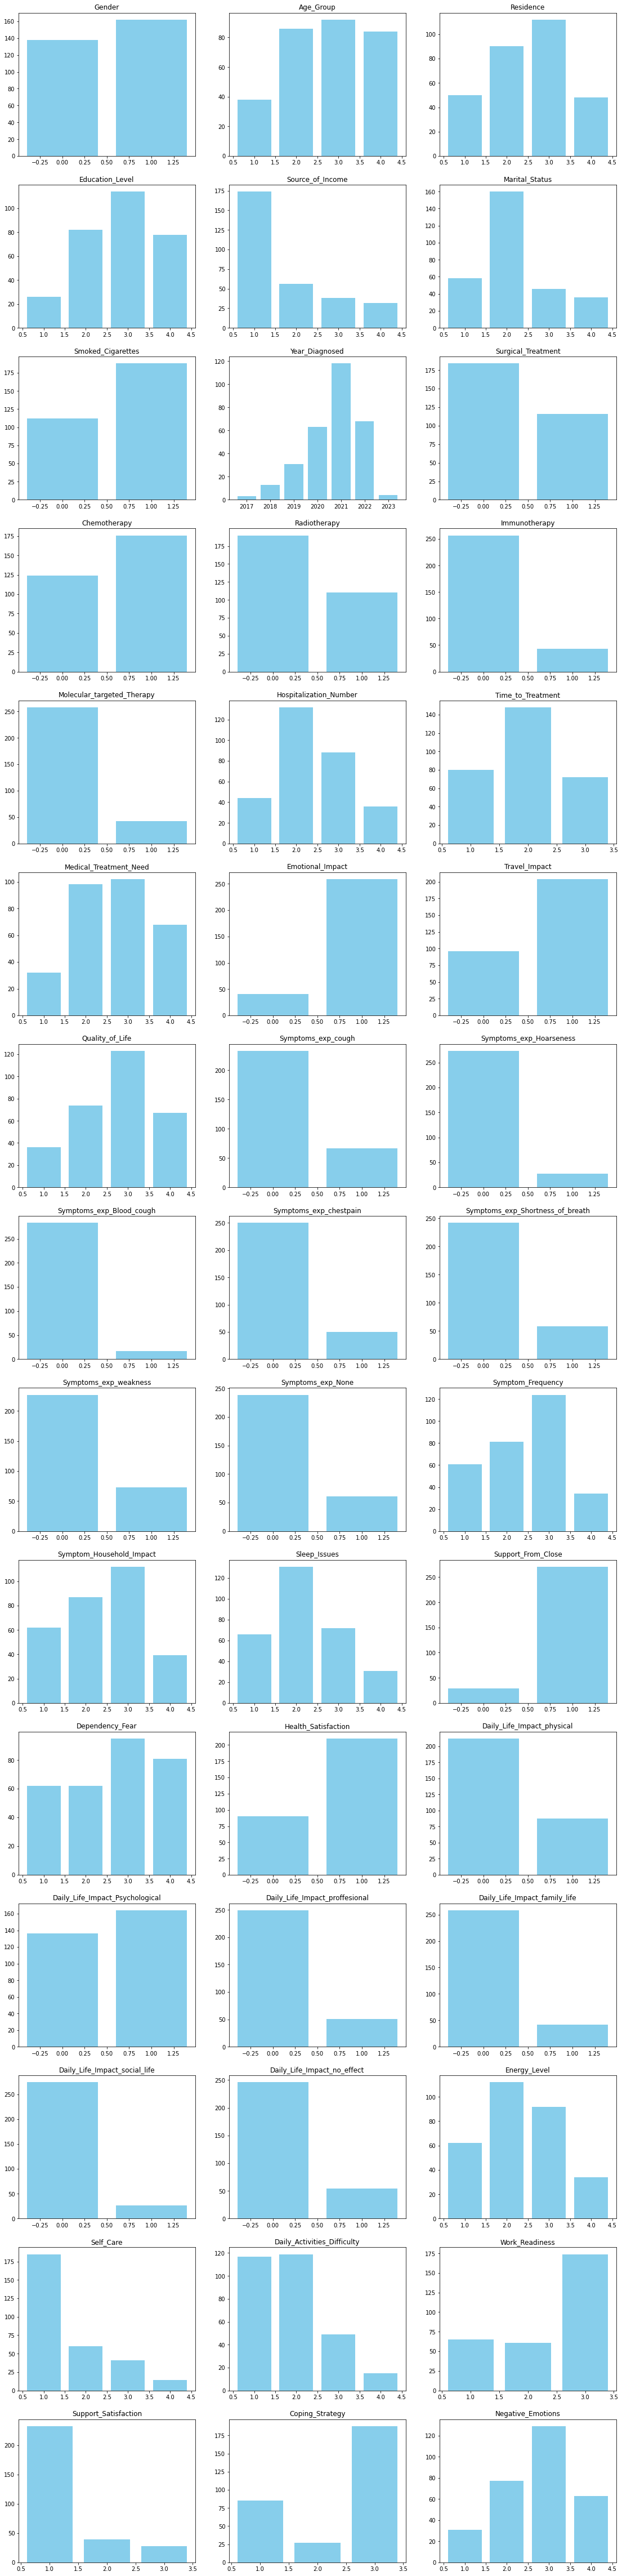

In [13]:
nrow=15
ncol=3
n=0
# Create a Figure
fig, axes = plt.subplots(nrow, ncol, figsize=(16, 64))
fig.tight_layout(pad=3)  # Adjust spacing between subplots

# Flatten the 2D axes array to iterate over it easily
axes = axes.flatten()

# Plot each column in the DataFrame
for col in df.columns:
    counts=df[col].value_counts()
    if n >= len(axes):  # Stop if we exceed the number of subplots
        break
    ax = axes[n]
    ax.bar(counts.index, counts.values, color='skyblue')  # Bar plot for each column
    ax.set_title(col)  # Title for each subplot
    n += 1

# Hide unused subplots (if any)
for i in range(n, len(axes)):
    axes[i].axis('off')

# Show the final plot
plt.show()

**There is imbalance in some  columns.**
 



In [14]:
#Quick check for overall raw column correlations
import seaborn as sns
correlation=df.corr()


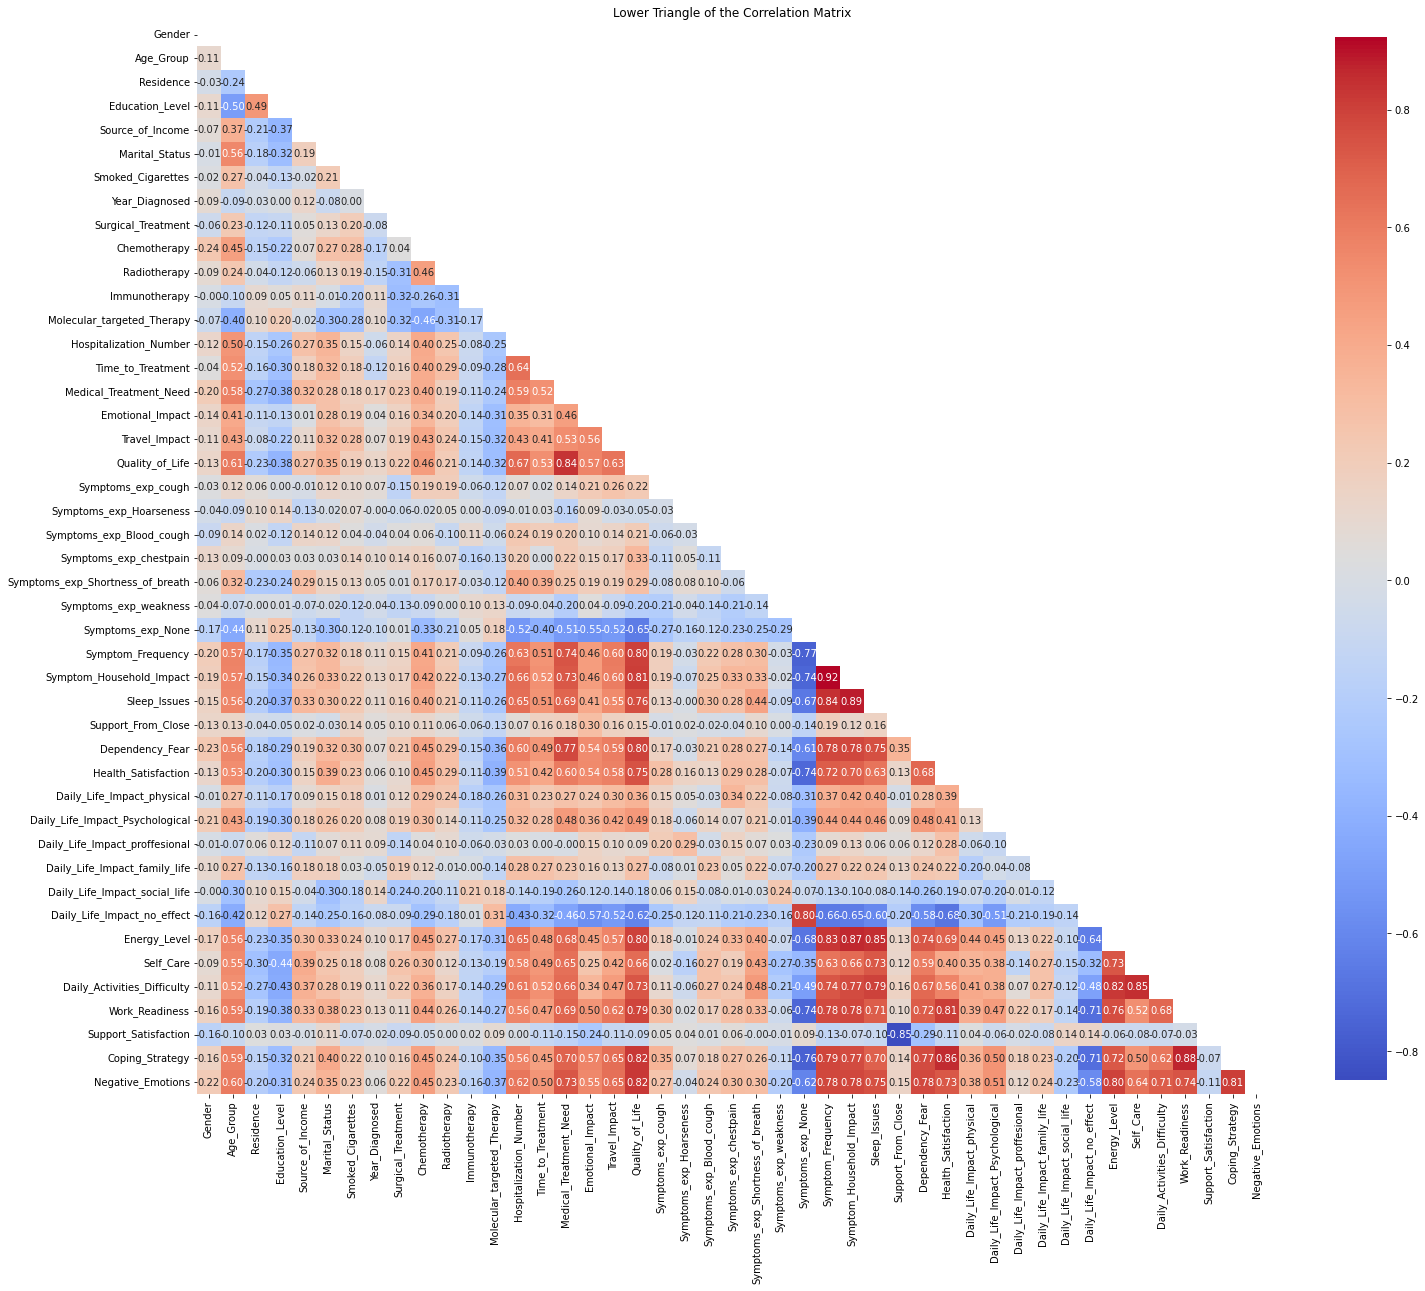

In [15]:
# Mask the upper triangle (to retain only the lower half)
mask = np.triu(np.ones_like(correlation, dtype=bool))
masked_corr = correlation.where(~mask)  # Apply the mask

# Apply the mask to the correlation matrix
plt.figure(figsize=(24, 24))
sns.heatmap(correlation, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Lower Triangle of the Correlation Matrix")
plt.show()


## Highly correlated pairs at first glance:

In [16]:

high_corr_pairs_positive = masked_corr.stack().loc[lambda x: x > 0.75]
high_corr_pairs_negative=masked_corr.stack().loc[lambda x: x < -0.75]

# Display the highly correlated pairs
print(high_corr_pairs_positive)



Quality_of_Life              Medical_Treatment_Need      0.836878
Symptom_Frequency            Quality_of_Life             0.804922
Symptom_Household_Impact     Quality_of_Life             0.810825
                             Symptom_Frequency           0.924228
Sleep_Issues                 Quality_of_Life             0.763622
                             Symptom_Frequency           0.844186
                             Symptom_Household_Impact    0.886402
Dependency_Fear              Medical_Treatment_Need      0.774507
                             Quality_of_Life             0.798719
                             Symptom_Frequency           0.781332
                             Symptom_Household_Impact    0.780562
                             Sleep_Issues                0.753834
Daily_Life_Impact_no_effect  Symptoms_exp_None           0.798049
Energy_Level                 Quality_of_Life             0.795971
                             Symptom_Frequency           0.828773
          

In [17]:
print(high_corr_pairs_negative)

Symptom_Frequency     Symptoms_exp_None    -0.765180
Support_Satisfaction  Support_From_Close   -0.849597
Coping_Strategy       Symptoms_exp_None    -0.762524
dtype: float64


# Data Analysis:
## Apriori for sub-groups:


In [18]:
#Demographic Info:
demograhic_cols=df.columns[0:6]
demograhic_cols

Index(['Gender', 'Age_Group', 'Residence', 'Education_Level',
       'Source_of_Income', 'Marital_Status'],
      dtype='object')

In [19]:
df_demog=df[demograhic_cols]
# df_demog

In [20]:
df_demog_encoded=pd.get_dummies(df_demog,columns=df_demog.columns)
df_demog_encoded

,Gender_0,Gender_1,Age_Group_1,Age_Group_2,Age_Group_3,Age_Group_4,Residence_1,Residence_2,Residence_3,Residence_4,...,Education_Level_3,Education_Level_4,Source_of_Income_1,Source_of_Income_2,Source_of_Income_3,Source_of_Income_4,Marital_Status_1,Marital_Status_2,Marital_Status_3,Marital_Status_4
0,0,1,1,0,0,0,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
1,0,1,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
2,0,1,0,1,0,0,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
4,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,1,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
296,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
297,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
298,1,0,0,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0


In [21]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [22]:
apriori_demog=pd.DataFrame()
apriori_demog = apriori(df_demog_encoded, min_support=0.25, use_colnames=True).sort_values(by='support',ascending=False)
# Add a column for the size of each itemset
apriori_demog['itemset_size'] = apriori_demog['itemsets'].apply(len)

# Find the largest itemsets
demog_largest_itemsets = apriori_demog[apriori_demog['itemset_size'] == apriori_demog['itemset_size'].max()]

print("Largest Itemsets:")
print(demog_largest_itemsets)

Largest Itemsets:
     support                                 itemsets  itemset_size
17  0.320000   (Source_of_Income_1, Marital_Status_2)             2
13  0.293333           (Gender_1, Source_of_Income_1)             2
14  0.290000             (Gender_1, Marital_Status_2)             2
12  0.286667           (Gender_0, Source_of_Income_1)             2
15  0.270000        (Age_Group_2, Source_of_Income_1)             2
16  0.250000  (Source_of_Income_1, Education_Level_3)             2


/opt/homebrew/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Adjusting the support, within this Demograhic group we can tell the in this data set we see gener1,income1, and marital status2 group, each more than 50% in the data. Likewise, as expexted it also turns out their combinations are also very frequent.

## Apriori for the Entire Data Set:

In [23]:
#OneHot coding:
df_all=pd.get_dummies(df,columns=df.columns)
df_all.head()

,Gender_0,Gender_1,Age_Group_1,Age_Group_2,Age_Group_3,Age_Group_4,Residence_1,Residence_2,Residence_3,Residence_4,...,Support_Satisfaction_1,Support_Satisfaction_2,Support_Satisfaction_3,Coping_Strategy_1,Coping_Strategy_2,Coping_Strategy_3,Negative_Emotions_1,Negative_Emotions_2,Negative_Emotions_3,Negative_Emotions_4
0,0,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
3,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [24]:
df_all.shape

(300, 131)

In [25]:
#Running Apriori for all, one-hot encoded data which has 131 variables generated after encoding.
apriori_all=pd.DataFrame()
apriori_all = apriori(df_all, min_support=0.25, use_colnames=True).sort_values(by='support',ascending=False)
# Add a column for the size of each itemset
apriori_all['itemset_size'] = apriori_all['itemsets'].apply(len)

# Find the largest itemsets
all_largest_itemsets = apriori_all[apriori_all['itemset_size'] == apriori_all['itemset_size'].max()]

print("Largest Itemsets:")
print(all_largest_itemsets)


/opt/homebrew/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Largest Itemsets:
         support                                           itemsets  \
817433  0.256667  (Emotional_Impact_1, Symptoms_exp_Blood_cough_...   
817437  0.253333  (Emotional_Impact_1, Symptoms_exp_Blood_cough_...   
817432  0.253333  (Emotional_Impact_1, Symptoms_exp_Blood_cough_...   
817434  0.250000  (Emotional_Impact_1, Symptoms_exp_Blood_cough_...   
817435  0.250000  (Emotional_Impact_1, Symptoms_exp_Blood_cough_...   
817436  0.250000  (Emotional_Impact_1, Symptoms_exp_Blood_cough_...   

        itemset_size  
817433            15  
817437            15  
817432            15  
817434            15  
817435            15  
817436            15  


In [ ]:
# pip install memory-profiler

In [27]:
import time as time
from memory_profiler import memory_usage

## Running the Apriori code and timing the process:

In [28]:


# Function for Apriori algorithm
def Apriori_all():
    apriori_all = pd.DataFrame()
    apriori_all = apriori(df_all, min_support=0.3, use_colnames=True).sort_values(by='support', ascending=False)

if __name__ == "__main__":
    start_time = time.time()

    # Measure memory usage
    mem_usage, _ = memory_usage(Apriori_all, retval=True)

    end_time = time.time()
    elapsed_time_apriori = end_time - start_time

    # Print memory and time performance
    print(f"Memory usage for Apriori: {max(mem_usage) - min(mem_usage):.2f} MiB")
    print(f"Execution time: {elapsed_time_apriori:.2f} seconds")


/opt/homebrew/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Memory usage for Apriori: 604.84 MiB
Execution time: 4.59 seconds


## Generate association rules with a minimum confidence of 0.7

In [ ]:
rules = association_rules(apriori_all, metric="confidence", min_threshold=0.7,num_itemsets=15)


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x105ac3cd0>>
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [1]:

# Step 2: Generate Association Rules
rules = association_rules(apriori_all, metric="confidence", min_threshold=0.7,num_itemsets=15)

# Step 3: Add Advanced Metrics

# Support, Confidence, and Lift are already part of the `association_rules` output

# Kulczynski: Average of the antecedent-to-consequent and consequent-to-antecedent confidence
rules['kulczynski'] = 0.5 * (rules['confidence'] + rules['support'] / rules['consequent support'])

# Jaccard: Intersection over union for antecedents and consequents
rules['jaccard'] = rules['support'] / (
    rules['antecedent support'] + rules['consequent support'] - rules['support']
)

# Chi-square statistic for association
rules['chi2'] = (
    (rules['support'] - (rules['antecedent support'] * rules['consequent support'])) ** 2
) / (rules['antecedent support'] * rules['consequent support'])

# Max confidence: Maximum of confidence and its complement (1 - confidence)
rules['max_confidence'] = rules[['confidence', 1 - rules['confidence']]].max(axis=1)

# Step 4: Display Rules with All Metrics
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'kulczynski', 'jaccard', 'chi2', 'max_confidence']])




NameError: name 'association_rules' is not defined

In [ ]:
# Show the association rules
rules_all.loc[31351,:]['antecedents']

frozenset({'coping_strategy_3',
           'daily_life_impact_social_life_0',
           'health_satisfaction_1',
           'support_from_close_1'})

In [ ]:
rules_all.loc[31351,:]['consequents']

frozenset({'daily_life_impact_no_effect_0',
           'emotional_impact_1',
           'symptoms_exp_blood_cough_0',
           'symptoms_exp_none_0'})

In [ ]:
rules_all.loc[31351,:]['confidence']

0.9090909090909091